# Face extraction experiment using face_recognition/dlib library
More info:
* https://github.com/ageitgey/face_recognition/tree/master/examples
* https://github.com/davisking/dlib/tree/master/python_examples

In [ ]:
# face_recognition requires cmake command available for dlib installation
import face_recognition
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

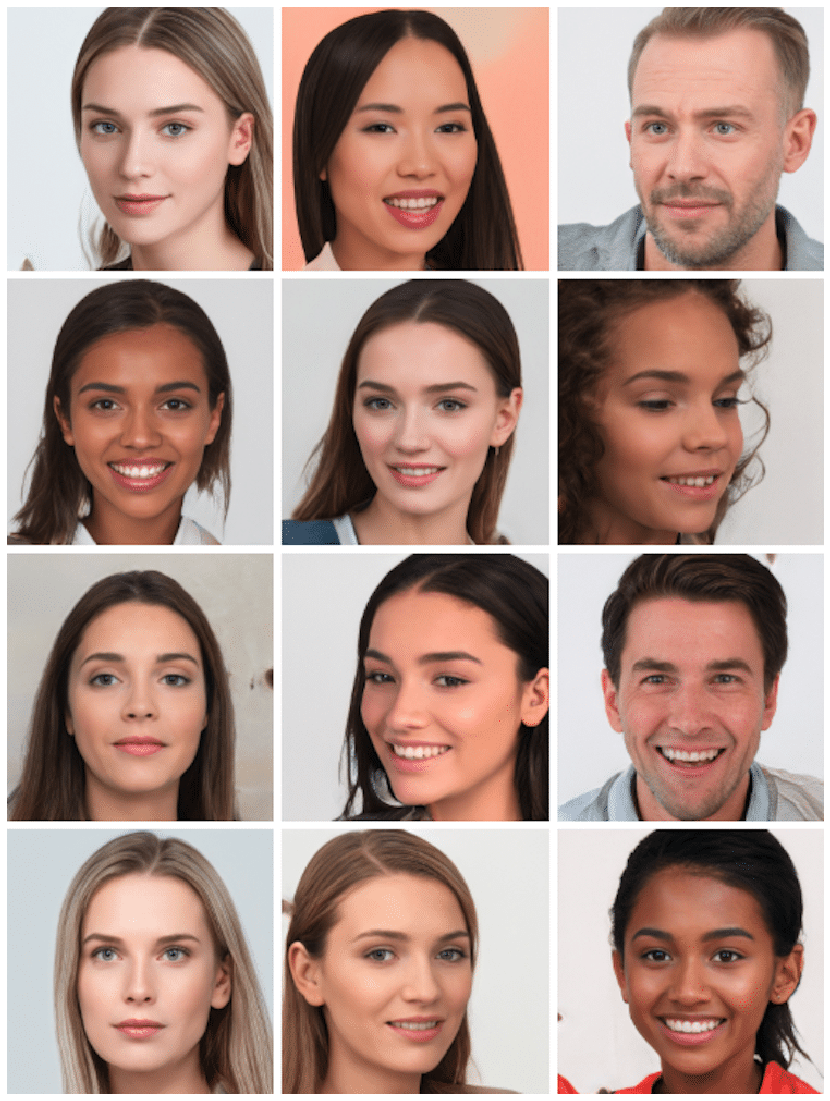

Found faces: 12


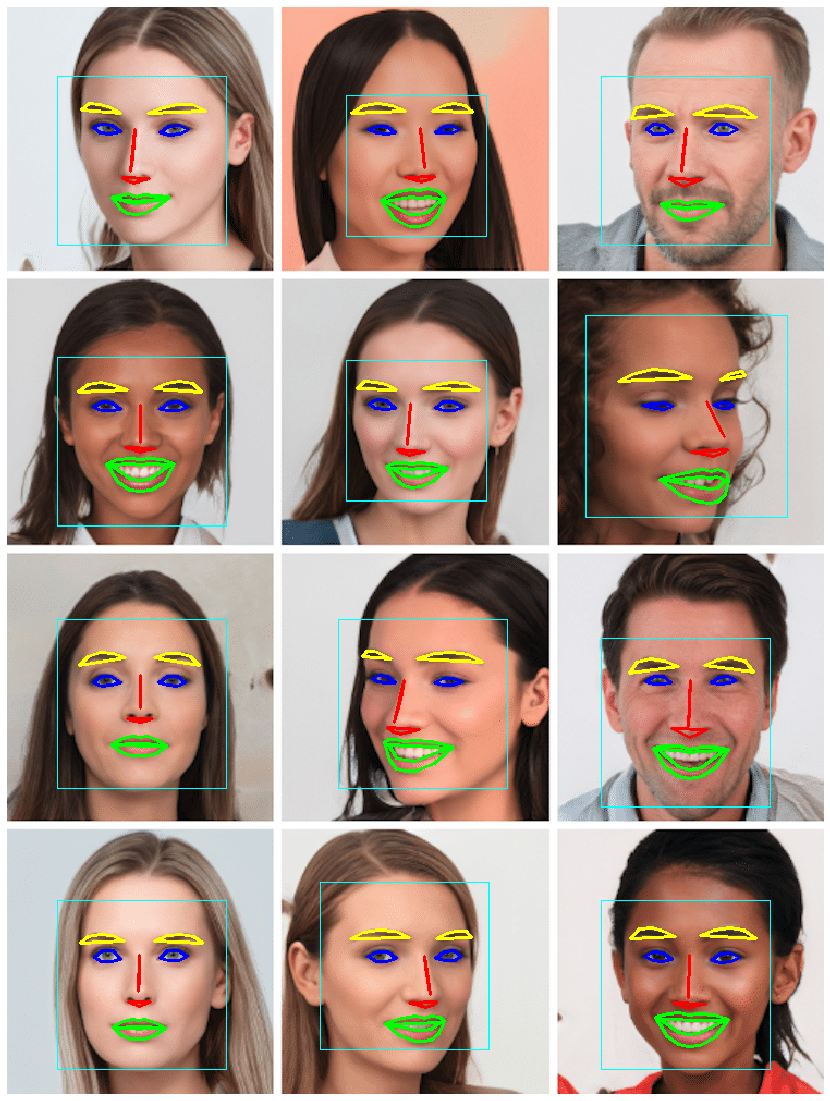

In [30]:
# Read image for edit
img = cv2.imread('100k-ai-faces-2.jpg')

# Draw original figure with rectangles
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Read the image for face detection
img_for_recognition = face_recognition.load_image_file('100k-ai-faces-2.jpg')

# Detect faces
faces = face_recognition.face_locations(img_for_recognition)

# faces_features = face_recognition.face_encodings(img_for_recognition)
# print (faces_features)

faces_landmarks_list = face_recognition.face_landmarks(img_for_recognition)
# print ('faces_landmarks:', faces_landmarks)

print("Found faces: {}".format(len(faces)))

# Extract faces
extracted_images = []

for face in faces:
    top, right, bottom, left = face
    
    # Draw rectangle around face
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 0), 1)
    
    face_data = img[top:bottom, left:right]
    extracted_images.append(face_data)
    
for faces_landmarks in faces_landmarks_list:
    
    points_left_eye = np.array([faces_landmarks['left_eye']])
    points_right_eye = np.array([faces_landmarks['right_eye']])
    points_top_lip = np.array([faces_landmarks['top_lip']])
    points_bottom_lip  = np.array([faces_landmarks['bottom_lip']])
    points_nose_bridge = np.array([faces_landmarks['nose_bridge']])
    points_nose_tip  = np.array([faces_landmarks['nose_tip']])
    points_left_eyebrow = np.array([faces_landmarks['left_eyebrow']])
    points_right_eyebrow  = np.array([faces_landmarks['right_eyebrow']])

    cv2.polylines(img, [points_left_eye], color=(255,0,0), isClosed=True, thickness=2)
    cv2.polylines(img, [points_right_eye], color=(255,0,0), isClosed=True, thickness=2)
    cv2.polylines(img, [points_top_lip], color=(0,255,0), isClosed=True, thickness=2)
    cv2.polylines(img, [points_bottom_lip], color=(0,255,0), isClosed=True, thickness=2)
    cv2.polylines(img, [points_nose_bridge], color=(0,0,255), isClosed=True, thickness=2)
    cv2.polylines(img, [points_nose_tip], color=(0,0,255), isClosed=True, thickness=2)
    cv2.polylines(img, [points_left_eyebrow], color=(0,255,255), isClosed=True, thickness=2)
    cv2.polylines(img, [points_right_eyebrow], color=(0,255,255), isClosed=True, thickness=2)

    
# Draw original figure with rectangles
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()